<a href="https://colab.research.google.com/github/shashi-kanth-1604/trend/blob/main/trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3


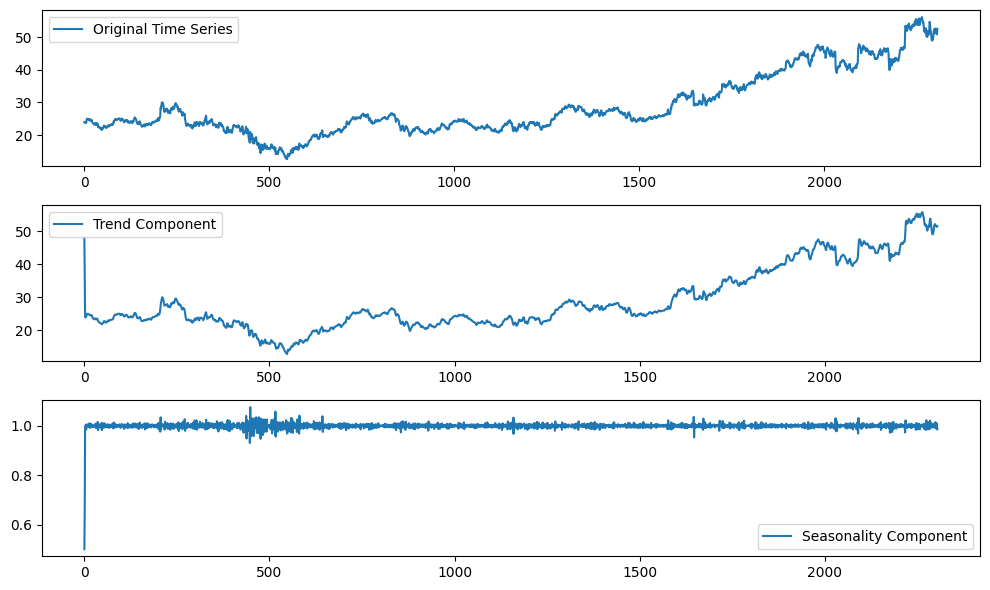

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
mine=pd.read_csv('stock.csv')
data=mine['date'].astype('category').cat.codes
import matplotlib.pyplot as plt

def estimate_trend(y, d):
    n = len(y)
    trend = [0]*n
    for t in range(n):
        if d % 2 == 1:  # odd d
            sum_y = sum(y[max(0, t-d//2):min(n, t+d//2+1)])
            count = min(t+1, n-t, d)
        else:  # even d
            sum_y = sum(y[max(0, t-d//2+1):min(n, t+d//2+1)])
            count = min(t+1, n-t, d)
        trend[t] = sum_y / count
    return trend

def estimate_seasonality(y, d, trend):
    n = len(y)
    seasonality = [0]*n
    for t in range(n):
        seasonality[t] = y[t] / trend[t]
    return seasonality

# Example usage:
y = mine['MSFT']  # Time series data
d = 3  # Number of seasons (odd)
# d = 4  # Number of seasons (even)

trend = estimate_trend(y, d)
seasonality = estimate_seasonality(y, d, trend)
z=[]
for i in range(len(trend)):
    z.append(trend[i]+seasonality[i]-y[i])
while True:
    if max(z)>1 and min(z)<-1:
        d=d+1
        trend=estimate_trend(y, d)
        seasonality=estimate_seasonality(y, d, trend)
        for i in range(len(trend)):
            z.append(trend[i]+seasonality[i]-y[i])
    else:
        print(d)
        break

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y, label='Original Time Series')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(seasonality, label='Seasonality Component')
plt.legend()

plt.tight_layout()
plt.show()